In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Atharva/Downloads/Personal_Finance_Dataset.csv")

In [4]:
df.shape 

(1500, 5)

In [5]:
df.columns  

Index(['Date', 'Transaction Description', 'Category', 'Amount', 'Type'], dtype='object')

In [6]:
df.dtypes 

Date                        object
Transaction Description     object
Category                    object
Amount                     float64
Type                        object
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [7]:
df.isnull().sum() 

Date                       0
Transaction Description    0
Category                   0
Amount                     0
Type                       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()  

,Amount
count,1500.000000
mean,1307.520913
std,982.283361
min,14.370000
25%,629.340000
50%,1156.285000
75%,1712.932500
max,4996.000000


In [11]:
df['Type'].value_counts()


Type
Expense    1222
Income      278
Name: count, dtype: int64

In [12]:
df['Category'].value_counts()


Category
Rent                165
Travel              160
Utilities           157
Health & Fitness    152
Shopping            150
Food & Drink        149
Salary              146
Entertainment       143
Investment          142
Other               136
Name: count, dtype: int64

In [13]:
df.select_dtypes(include='number').corr()


,Amount
Amount,1.0


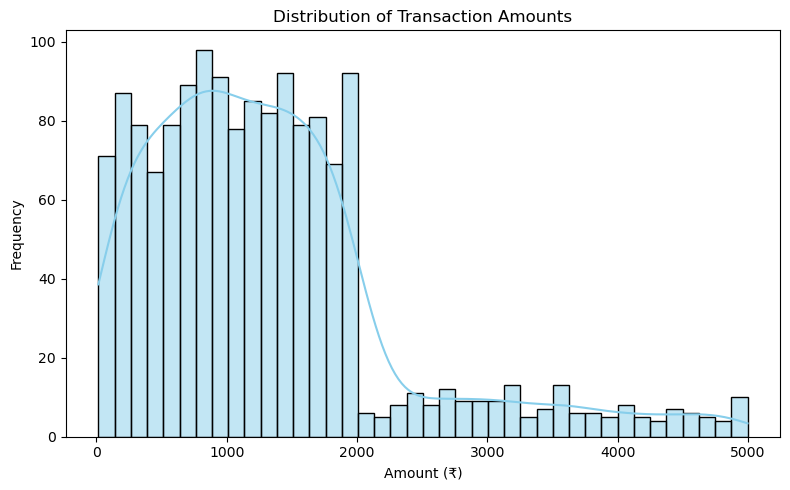

In [15]:
#Distribution of transaction amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (₹)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\Atharva\AppData\Local\Temp\ipykernel_18112\3629352223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expense_categories.values, y=top_expense_categories.index, palette='Blues_r')


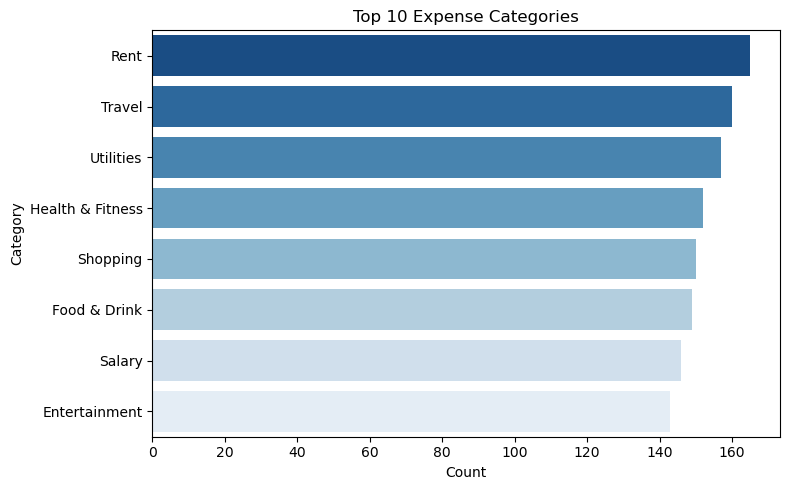

In [17]:
# Top 10 Expense Categories
expense_df = df[df['Type'] == 'Expense']
top_expense_categories = expense_df['Category'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_expense_categories.values, y=top_expense_categories.index, palette='Blues_r')
plt.title('Top 10 Expense Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [23]:
df['Month'] = df['Date'].dt.month_name()

In [24]:
# 3. Monthly Spending Trend
monthly_expense = expense_df.groupby('Month')['Amount'].sum().sort_index()

plt.figure(figsize=(10, 5))
monthly_expense.plot(kind='bar', color='salmon')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Total Expense (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Month'

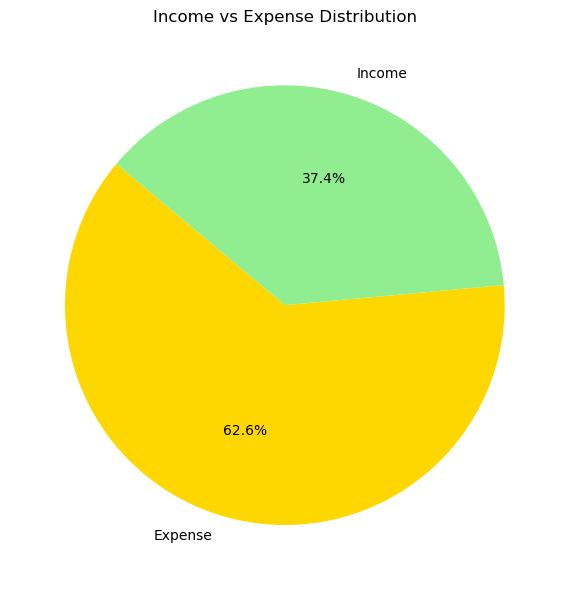

In [25]:
# Summarize total income and expense, then visualize as a pie chart
type_summary = df.groupby('Type')['Amount'].sum()

plt.figure(figsize=(6, 6))
type_summary.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen'])
plt.title('Income vs Expense Distribution')
plt.ylabel('')  # Remove y-label
plt.tight_layout()
plt.show()


C:\Users\Atharva\AppData\Local\Temp\ipykernel_18112\680581184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Amount', data=df, palette='pastel')


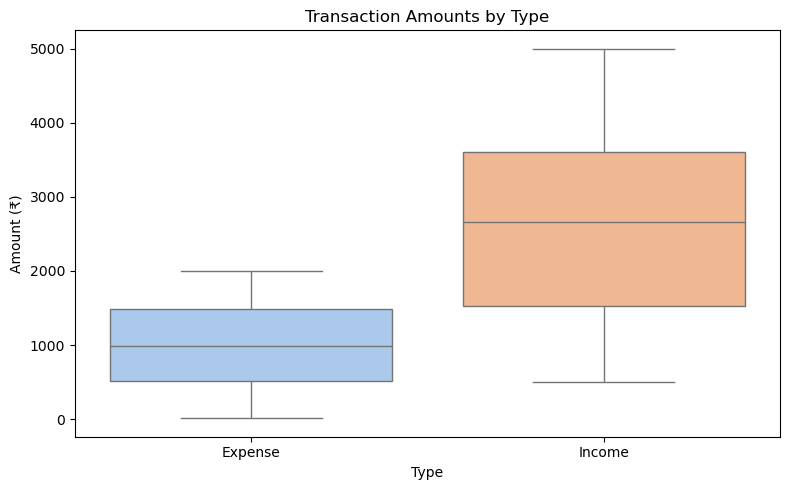

In [26]:
# Visualize spread and outliers of 'Amount' for Income vs Expense using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Type', y='Amount', data=df, palette='pastel')
plt.title('Transaction Amounts by Type')
plt.ylabel('Amount (₹)')
plt.tight_layout()
plt.show()
